In [1]:
import sys 
import amfe
import matplotlib.pyplot as plt
import numpy as np
import scipy
import copy

msh_dict = {}
msh_dict[0] = amfe.amfe_dir('meshes/test_meshes/Geom3.msh')
msh_dict[1] = amfe.amfe_dir('meshes/test_meshes/simple_2.msh')
msh_dict[2] = mshfile = amfe.amfe_dir('meshes/test_meshes/3_partition_pressure_corner.msh')
msh_dict[3] = mshfile = amfe.amfe_dir('meshes/test_meshes/geo_hole_quad_part_4.msh')
msh_dict[4] = mshfile = amfe.amfe_dir('meshes/test_meshes/2_partitions_quad_mesh.msh')
msh_dict[5] = mshfile = amfe.amfe_dir('meshes/test_meshes/2_partitions_2quad_mesh.msh')
msh_dict[6] = mshfile = amfe.amfe_dir('meshes/test_meshes/4_partitions_quad_mesh.msh')
msh_dict[7] = mshfile = amfe.amfe_dir('meshes/test_meshes/3_partition_2d_blade_quad_mesh.msh')
msh_dict[8] = mshfile = amfe.amfe_dir('1_quad_elem.msh')


domain_id = {}
domain_id[0] = 3
domain_id[1] = 3
domain_id[2] = 11
domain_id[3] = 8
domain_id[4] = 3
domain_id[5] = 3
domain_id[6] = 3
domain_id[7] = 3
domain_id[8] = 6

# select mesh to be plotted
mesh_id = 5
mshfile = msh_dict[mesh_id]

m = amfe.Mesh()
m.import_msh(mshfile)

m.split_in_groups()


# creating material
my_material = amfe.KirchhoffMaterial(E=210E9, nu=0.3, rho=7.86E3, plane_stress=True, thickness=0.1)

# genereting more domains from a basic sector
sys.path.append(r"H:\TUM-PC\Dokumente\Projects\FETI")
from cyclic_domain_test import *

alpha = [90,210,330]
submesh_dict = {}

my_system = amfe.MechanicalAssembly()

for key,alpha_i in enumerate(alpha):
    new = rot_z(m.nodes,alpha_i)
    submesh = copy.deepcopy(m.groups[domain_id[mesh_id]])
    submesh.parent_mesh.nodes = new
    submesh = m.groups[domain_id[mesh_id]]
    submesh.parent_mesh.nodes = new
    submesh_dict[key] = copy.deepcopy(submesh)

    my_system.append_domain(submesh, my_material)


Python was not able to load the fast fortran material routines.


*************************************************************
Loading gmsh-mesh from H:\TUM-PC\Dokumente\Projects\AMfe\meshes/test_meshes/2_partitions_2quad_mesh.msh
Mesh H:\TUM-PC\Dokumente\Projects\AMfe\meshes/test_meshes/2_partitions_2quad_mesh.msh successfully imported. 
Assign a material to a physical group.
*************************************************************


In [2]:
my_system.domain_dict[1].parent_mesh.nodes

array([[  0.00000000e+00,   0.00000000e+00],
       [  6.12323400e-17,   1.00000000e+00],
       [  1.22464680e-16,   2.00000000e+00],
       [ -1.00000000e+00,   2.00000000e+00],
       [ -1.00000000e+00,   1.00000000e+00],
       [ -1.00000000e+00,   6.12323400e-17]])

In [3]:
submesh_dict[1].parent_mesh.nodes

array([[ 0.        ,  0.        ],
       [-0.8660254 , -0.5       ],
       [-1.73205081, -1.        ],
       [-1.23205081, -1.8660254 ],
       [-0.3660254 , -1.3660254 ],
       [ 0.5       , -0.8660254 ]])

In [4]:
submesh_dict[2].parent_mesh.nodes

array([[ 0.        ,  0.        ],
       [ 0.8660254 , -0.5       ],
       [ 1.73205081, -1.        ],
       [ 2.23205081, -0.1339746 ],
       [ 1.3660254 ,  0.3660254 ],
       [ 0.5       ,  0.8660254 ]])

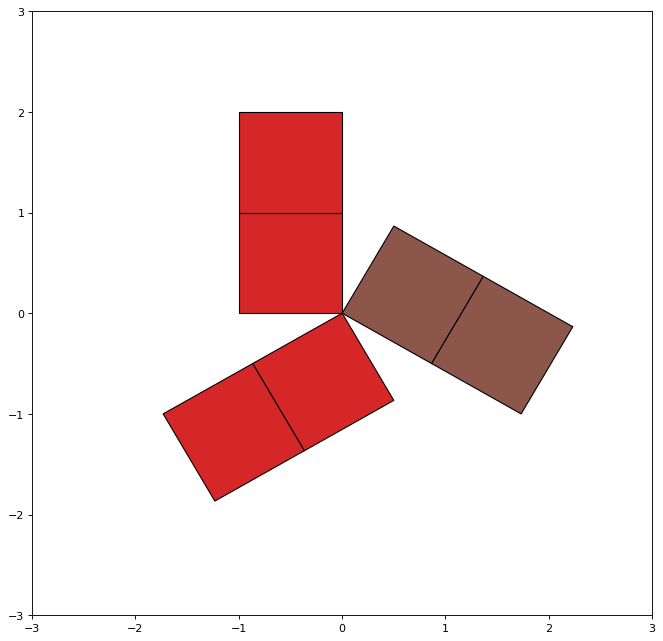

In [5]:
fig, ax1=plt.subplots(1,figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
ax1 = amfe.plot_submesh(submesh_dict[0],ax1)
ax1 = amfe.plot_submesh(submesh_dict[1],ax1)
ax1 = amfe.plot_submesh(submesh_dict[2],ax1)
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.show()

C:\Users\ge72tih\AppData\Local\Continuum\anaconda3\envs\py36\Lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


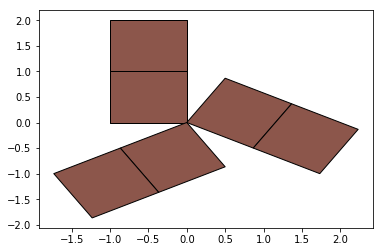

In [6]:
d1 = my_system.get_domain(1)
sub_dir = d1.get_submesh('phys_group',1)
sub_neu = d1.get_submesh('phys_group',2)


#my_system.apply_neumann_boundaries(1,sub_neu,10)
#my_system.apply_dirichlet_boundaries(1,sub_dir,0.0)

my_system.create_assembly_dataframe()
new_m = my_system.create_mesh_obj()


my_system.update_submesh_with_global_mesh()
new_m.split_in_groups()

amfe.plot_submesh(new_m.groups[3])
plt.show()

In [7]:
# selectiong submeshes for boundary condition
sub_neu1 = my_system.get_submesh(1,2)
sub_neu2 = my_system.get_submesh(2,2)
sub_neu3 = my_system.get_submesh(3,2)

sub_dir1 = my_system.get_submesh(1,1)
sub_dir2 = my_system.get_submesh(2,1)
sub_dir3 = my_system.get_submesh(3,1)

In [8]:
# appling bc
value = 10e8
my_system.apply_neumann_boundaries(1,sub_neu1,value)
my_system.apply_neumann_boundaries(2,sub_neu2,value)
my_system.apply_neumann_boundaries(3,sub_neu3,value)

my_system.apply_dirichlet_boundaries(1,sub_dir1,0.0,'xy')
my_system.apply_dirichlet_boundaries(2,sub_dir2,0.0,'xy')
my_system.apply_dirichlet_boundaries(3,sub_dir3,0.0,'xy')

{1: <amfe.mesh.SubMesh at 0x2891f5e91d0>,
 2: <amfe.mesh.SubMesh at 0x28920709278>,
 3: <amfe.mesh.SubMesh at 0x2892084e1d0>}

In [9]:
sub1 = amfe.FETIsubdomain(my_system.domain_dict[1])

Preallocating the stiffness matrix
Done preallocating stiffness matrix with 2 elements and 12 dofs.
Time taken for preallocation: 0.00 seconds.


In [10]:
u = {}

for key in [1,2,3]:
    sub1 = amfe.FETIsubdomain(my_system.domain_dict[key])
    K1, f = sub1.assemble_k_and_f()
    K1 = K1.todense()
    K, fext1 = sub1.assemble_k_and_f_neumann()
    K1, f1 = sub1.insert_dirichlet_boundary_cond(K1,fext1)
    B1_dict = sub1.assemble_interface_boolean_matrix()

    u1 = np.linalg.solve(K1,fext1)
    u[key] = u1

Preallocating the stiffness matrix
Done preallocating stiffness matrix with 2 elements and 12 dofs.
Time taken for preallocation: 0.00 seconds.
Preallocating the stiffness matrix
Done preallocating stiffness matrix with 2 elements and 12 dofs.
Time taken for preallocation: 0.00 seconds.
Preallocating the stiffness matrix
Done preallocating stiffness matrix with 2 elements and 12 dofs.
Time taken for preallocation: 0.00 seconds.


In [11]:
local_system = my_system.domain_dict[1]
sub1.mesh.connectivity
sub1.mesh.nodes

array([[ 0.        ,  0.        ],
       [ 0.8660254 , -0.5       ],
       [ 1.3660254 ,  0.3660254 ],
       [ 0.5       ,  0.8660254 ],
       [ 1.73205081, -1.        ],
       [ 2.23205081, -0.1339746 ]])

In [12]:
local_system = my_system.domain_dict[2]
sub1.mesh.connectivity
sub1.mesh.nodes

array([[ 0.        ,  0.        ],
       [ 0.8660254 , -0.5       ],
       [ 1.3660254 ,  0.3660254 ],
       [ 0.5       ,  0.8660254 ],
       [ 1.73205081, -1.        ],
       [ 2.23205081, -0.1339746 ]])

In [13]:
local_system = my_system.domain_dict[3]
sub1.mesh.connectivity
sub1.mesh.nodes

array([[ 0.        ,  0.        ],
       [ 0.8660254 , -0.5       ],
       [ 1.3660254 ,  0.3660254 ],
       [ 0.5       ,  0.8660254 ],
       [ 1.73205081, -1.        ],
       [ 2.23205081, -0.1339746 ]])

In [14]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


def plot_static(scale=0):
    fig, ax1=plt.subplots(1,figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
    for key in [1,2,3]:
        sub1 = amfe.FETIsubdomain(my_system.domain_dict[key])
        connectivity = sub1.mesh.connectivity
        u_fea = u[key]
        nodes = sub1.mesh.nodes
        amfe.plotDeformQuadMesh(connectivity,nodes, u_fea ,scale, ax1) 
        #plt.figure()
        #plt.plot(u_fea)
        
    plt.show()
    
interact(plot_static,scale=(0,100,1))

A Jupyter Widget

<function __main__.plot_static>

In [15]:
sub2 = my_system.domain_dict[3]
neu_elem = sub2.neumann_submesh[0]

neu_elem.connectivity

[array([14, 15], dtype=int64)]

In [16]:
new_m.el_df

,idx_gmsh,local_idx,el_type,no_of_tags,phys_group,geom_entity,no_of_mesh_partitions,partition_id,partitions_neighbors,domain,5,6,7,8
0,1,1,straight_line,4,1,2,1,1,None,1,0,5,NaN,NaN
1,2,2,straight_line,4,2,2,1,1,None,1,2,3,NaN,NaN
2,3,3,Quad4,5,3,1,2,1,[-2],1,0,1,4.0,5.0
3,4,4,Quad4,5,3,1,2,2,[-1],1,1,2,3.0,4.0
4,5,1,straight_line,4,1,2,1,3,None,2,6,11,NaN,NaN
5,6,2,straight_line,4,2,2,1,3,None,2,8,9,NaN,NaN
6,7,3,Quad4,5,3,1,2,3,[-4],2,6,7,10.0,11.0
7,8,4,Quad4,5,3,1,2,4,[-3],2,7,8,9.0,10.0
8,9,1,straight_line,4,1,2,1,5,None,3,12,17,NaN,NaN
9,10,2,straight_line,4,2,2,1,5,None,3,14,15,NaN,NaN


In [17]:
d1.elem_dataframe

,idx_gmsh,local_idx,el_type,no_of_tags,phys_group,geom_entity,no_of_mesh_partitions,partition_id,partitions_neighbors,domain,5,6,7,8
2,3,3,Quad4,5,3,1,2,1,[-2],1,0,1,4.0,5.0
3,4,4,Quad4,5,3,1,2,2,[-1],1,1,2,3.0,4.0


In [18]:
sub_neu1.elements_list

[1]

In [19]:
new_m.el_df

,idx_gmsh,local_idx,el_type,no_of_tags,phys_group,geom_entity,no_of_mesh_partitions,partition_id,partitions_neighbors,domain,5,6,7,8
0,1,1,straight_line,4,1,2,1,1,None,1,0,5,NaN,NaN
1,2,2,straight_line,4,2,2,1,1,None,1,2,3,NaN,NaN
2,3,3,Quad4,5,3,1,2,1,[-2],1,0,1,4.0,5.0
3,4,4,Quad4,5,3,1,2,2,[-1],1,1,2,3.0,4.0
4,5,1,straight_line,4,1,2,1,3,None,2,6,11,NaN,NaN
5,6,2,straight_line,4,2,2,1,3,None,2,8,9,NaN,NaN
6,7,3,Quad4,5,3,1,2,3,[-4],2,6,7,10.0,11.0
7,8,4,Quad4,5,3,1,2,4,[-3],2,7,8,9.0,10.0
8,9,1,straight_line,4,1,2,1,5,None,3,12,17,NaN,NaN
9,10,2,straight_line,4,2,2,1,5,None,3,14,15,NaN,NaN


In [20]:
domain = my_system.get_domain(1)

In [21]:
domain.__material__


amfe.material.KirchhoffMaterial(210000000000.000000,0.300000,7860.000000,True,0.100000)

In [23]:
my_system.mesh_class.load_group_to_mesh(1, domain.__material__ , 'domain')


 domain 1 with 4 elements successfully added.
Total number of elements in mesh: 4
*************************************************************


In [ ]:
my_system